In [30]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv("customers.csv")
df.isnull()
df_cleaned = df.dropna()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
new_df = df.drop(columns=['CustomerID'])
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


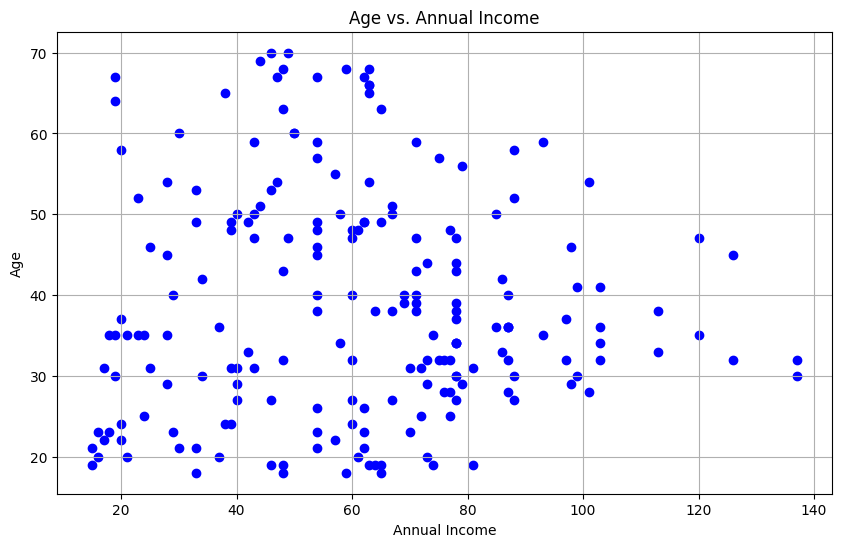

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Age'], color='blue', marker='o')
plt.title('Age vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(True)
plt.show()

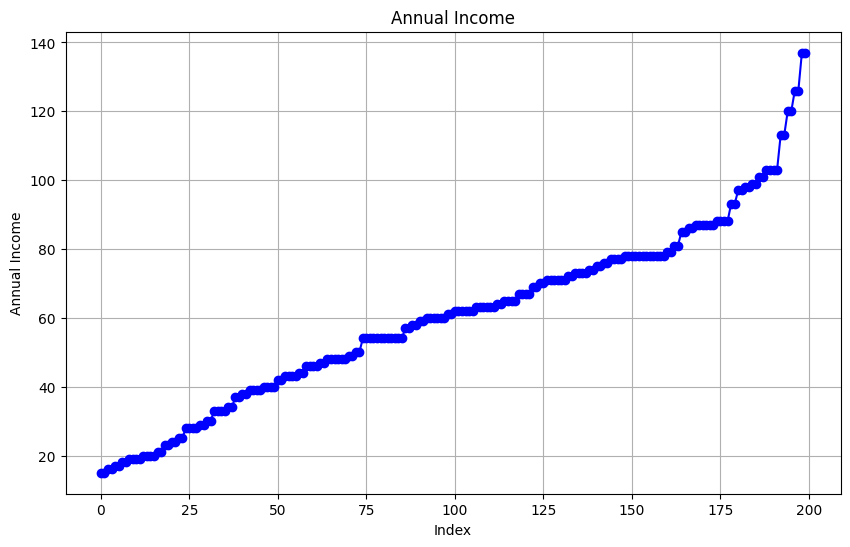

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df['Annual Income (k$)'], color='blue', marker='o')
plt.title('Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

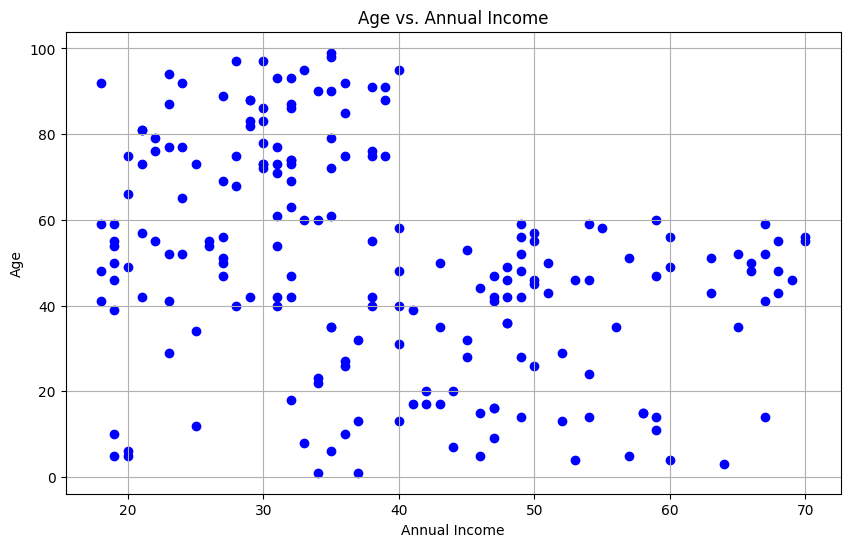

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='blue', marker='o')
plt.title('Age vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [47]:
y = np.asarray(df["Spending Score (1-100)"])
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

In [48]:
x = df[['Gender', 'Age', 'Annual Income (k$)']]
x = pd.get_dummies(x, drop_first=True)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.42456879, -1.73899919,  1.12815215],
       [-1.28103541, -1.73899919,  1.12815215],
       [-1.3528021 , -1.70082976, -0.88640526],
       [-1.13750203, -1.70082976, -0.88640526],
       [-0.56336851, -1.66266033, -0.88640526],
       [-1.20926872, -1.66266033, -0.88640526],
       [-0.27630176, -1.62449091, -0.88640526],
       [-1.13750203, -1.62449091, -0.88640526],
       [ 1.80493225, -1.58632148,  1.12815215],
       [-0.6351352 , -1.58632148, -0.88640526],
       [ 2.02023231, -1.58632148,  1.12815215],
       [-0.27630176, -1.58632148, -0.88640526],
       [ 1.37433211, -1.54815205, -0.88640526],
       [-1.06573534, -1.54815205, -0.88640526],
       [-0.13276838, -1.54815205,  1.12815215],
       [-1.20926872, -1.54815205,  1.12815215],
       [-0.27630176, -1.50998262, -0.88640526],
       [-1.3528021 , -1.50998262,  1.12815215],
       [ 0.94373197, -1.43364376,  1.12815215],
       [-0.27630176, -1.43364376, -0.88640526],
       [-0.27630176, -1.39547433,  1.128

In [51]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = "auto")

In [52]:
k_means.fit(x)

KMeans(n_clusters=5)

In [54]:
labels = k_means.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 2, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)